In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cal = np.load("../results/summary_calibration.npy").item()
val = np.load("../results/summary_validation.npy").item()

In [3]:
def converter(results_instance, model_name, metric_name):
    return [list(results_instance[model_name][dur][metric_name].values()) for dur in range(1, 21)]

def converted_agg(results_instance, model_name, metric_name, numpy_function):
    return [numpy_function(list(results_instance[model_name][dur][metric_name].values())) for dur in range(1, 21)]

In [4]:
def nse_vs_duration(model, color, ax=None, fontsize=16):
    
    data = converter(val, model, "NSE")
    
    df = pd.DataFrame({key:np.append(data[key-1], np.repeat(np.nan, key-1)) for key in range(1,21)})
    
    m = [np.nanmean(data[key-1]) for key in range(1,21)]
    
    m_min = [np.nanmin(data[key-1]) for key in range(1,21)]
    m_max = [np.nanmax(data[key-1]) for key in range(1,21)]
    
    ax.fill_between(range(1,21), m_min, m_max, color=color, alpha=0.4, zorder=0)
    
    for key, value in df.items():
        ax.plot(np.ones(len(value))*key, value, marker='o', markersize=7, linestyle='None', 
                 markerfacecolor='None', markeredgecolor='gray', markeredgewidth=1, zorder=1)
    
    
    ax.plot(range(1,21), m, c=color, linestyle="-", linewidth=3, zorder=2)
    
    
    ax.set_xticks(range(1,21))
    ax.set_xticklabels(range(1,21), fontsize=fontsize)
    ax.set_yticks(np.arange(0.,0.8,0.1))
    ax.set_yticklabels(np.round(np.arange(0.,0.8,0.1),1), fontsize=fontsize)

    ax.set_ylim(0., 0.75)
    ax.set_xlim(0, 21)
    
    ax.text(15, 0.3, model, fontsize=fontsize+4, weight="bold")
    
    ax.text(13, 0.2, "{} ({}) / {}".format(np.round(np.max(m),2), 
                                           np.argmax(m)+1, 
                                           np.round(m[0],2)), fontsize=fontsize+2, style="italic")

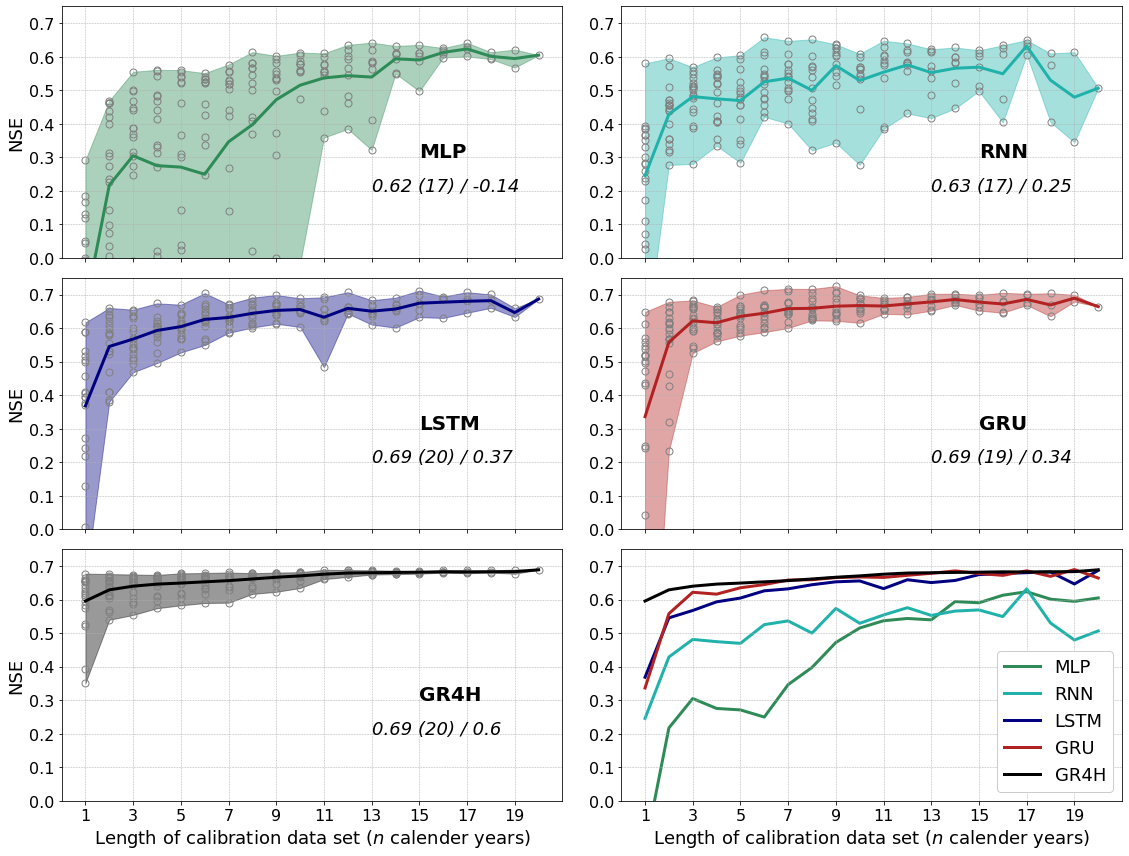

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=False, figsize=(16,12))

axes=axes.ravel()

df = pd.DataFrame({key:converted_agg(val, key, "NSE", np.mean) for key in ['MLP', 'RNN', 'LSTM', 'GRU', 'GR4H']}, 
                  index=np.arange(1,21))

fontsize=16

for i, model_name, color in zip(range(5), 
                                ['MLP', 'RNN', 'LSTM', 'GRU', 'GR4H'],
                                ["seagreen", "lightseagreen", "navy", "firebrick", "black"]):
    
    nse_vs_duration(model_name, color, axes[i], fontsize=fontsize)
    
    axes[i].grid(linestyle="--", linewidth=0.5)
    
    axes[5].plot(df[model_name], label=model_name, c=color, linestyle="-", linewidth=3, zorder=i)


axes[5].set_xticks(range(1,21,2))
axes[5].set_xticklabels(range(1,21,2), fontsize=fontsize)
axes[5].set_yticks(np.arange(0.,0.8,0.1))
axes[5].set_yticklabels(np.round(np.arange(0.,0.8,0.1),1), fontsize=fontsize)

axes[5].set_ylim(0., 0.75)
#axes[5].set_xlim(-1, 20)

axes[5].legend(loc=4, fontsize=fontsize+2, framealpha=1)
axes[5].grid(linestyle="--", linewidth=0.5)

axes[4].set_xlabel("Length of calibration data set ("+r"$n$ " +"calender years)", fontsize=fontsize+2)
axes[5].set_xlabel("Length of calibration data set ("+r"$n$ " +"calender years)", fontsize=fontsize+2)

axes[0].set_ylabel("NSE", fontsize=fontsize+2)
axes[2].set_ylabel("NSE", fontsize=fontsize+2)
axes[4].set_ylabel("NSE", fontsize=fontsize+2)

fig.tight_layout()

In [6]:
fig.savefig("../results/figures/kali_nse.png", dpi=150, bbox_inches="tight")

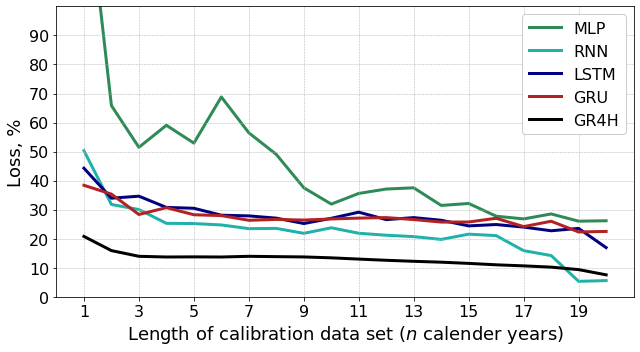

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,5))

fontsize=16

for i, model_name, color in zip(range(5), 
                                ['MLP', 'RNN', 'LSTM', 'GRU', 'GR4H'],
                                ["seagreen", "lightseagreen", "navy", "firebrick", "black"]):
    
    c = converted_agg(cal, model_name, "NSE", np.mean)
    v = converted_agg(val, model_name, "NSE", np.mean)
    
    ax.plot(np.arange(1,21), (np.array(c)-np.array(v))/np.abs(np.array(c))*100, c=color, label=model_name, 
            linestyle="-", linewidth=3, zorder=i)
    
   
ax.legend(loc=1, fontsize=fontsize, framealpha=1.)

ax.set_xticks(range(1,21,2))
ax.set_xticklabels(range(1,21,2), fontsize=fontsize)
ax.set_yticks(np.arange(0.,100,10))
ax.set_yticklabels(range(0,100,10), fontsize=fontsize)

ax.grid(linestyle="--", linewidth=0.5)

ax.set_ylim(0, 100)
ax.set_xlim(0, 21)

ax.set_ylabel("Loss, %", fontsize=fontsize+2)
ax.set_xlabel("Length of calibration data set ("+r"$n$ " +"calender years)", fontsize=fontsize+2)

fig.tight_layout()

In [8]:
fig.savefig("../results/figures/kali_nse_loss.png", dpi=150, bbox_inches="tight")